In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

**Como solucionar el overfitting y el underfitting?**

Viarianza Alta:

- Conseguir más ejemplos
- Reducir cantidad de features
- Aumentar coeficiente de regularización

Bias Alto:

- Más features
- Modelo más complejo

Mal resultado general:

- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidas por tu dataset

In [103]:
warnings.filterwarnings('ignore')

In [4]:
opening = pd.read_csv('/Users/luifer/teaching/machine-learning-platzi-master/datasets/X_opening.csv')
opening.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,9.634204e+08,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,8.796209e+08,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,1.084439e+09,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2.600021e+08,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


In [5]:
y = opening['worldwide_gross']
X = opening.drop(['worldwide_gross','budget'], axis = 1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [9]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.7929126071888781

In [10]:
scores = cross_val_score(Lasso(), X, y, cv = 5, scoring = 'r2')
scores

array([0.59315745, 0.69012026, 0.55551984, 0.3491635 , 0.22954419])

In [106]:
scores.mean()

0.44964021745791805

# Selección de modelos

**Overfiting o underfiting**

Para saber si estamos en overfiting o en underfiting necesitamos los scores de entrenamiento y test.

In [31]:
from sklearn.model_selection import cross_validate

### cross_validate(return_train_score = True)
- train_score
- test_score

In [108]:
results = cross_validate(Lasso(), X, y, return_train_score = True, cv = 5)
results

{'fit_time': array([0.00732398, 0.03124833, 0.00701046, 0.04601932, 0.05390596]),
 'score_time': array([0.       , 0.       , 0.       , 0.       , 0.0020144]),
 'test_score': array([0.59315745, 0.69012026, 0.55551984, 0.3491635 , 0.22954419]),
 'train_score': array([0.68987999, 0.7698129 , 0.76584093, 0.7606603 , 0.75822332])}

In [109]:
train_score = results['train_score']
test_score = results['test_score']
print(np.mean(train_score))
print(np.mean(test_score))

0.7491178363039035
0.44964021745791805


**Tenemos bias elevado, varianza elevada (underfitting), por lo que tenemos que buscar modelos más complejos**

## Curva de validación y Curva de Aprendizaje

In [110]:
from sklearn.neighbors import KNeighborsRegressor

### KNeighborsRegressor()

In [112]:
cross_validate(KNeighborsRegressor(), X, y, return_train_score = True, cv = 5)

{'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.00651002]),
 'score_time': array([0.01562834, 0.01563334, 0.        , 0.01562428, 0.        ]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

- KNeighborsRegressor(10)

In [113]:
cross_validate(KNeighborsRegressor(10), X, y, return_train_score = True, cv = 5)

{'fit_time': array([0.0059979 , 0.0079968 , 0.01598859, 0.00599599, 0.00704694]),
 'score_time': array([0.00899267, 0.01498985, 0.01798964, 0.01199651, 0.00998068]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

In [115]:
from sklearn.model_selection import validation_curve

In [116]:
n = np.arange(2, 50, 2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [117]:
train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name = 'n_neighbors',
                                            param_range = n,
                                            cv = 5)

In [120]:
train_scores

array([[0.85254787, 0.87500249, 0.87361899, 0.87096664, 0.86944354],
       [0.76258234, 0.80362711, 0.80107876, 0.79649437, 0.79225826],
       [0.71882872, 0.77528919, 0.77290638, 0.76735431, 0.76232037],
       [0.68629696, 0.77062676, 0.76985196, 0.76407441, 0.75829891],
       [0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953],
       [0.66669119, 0.75639535, 0.75224453, 0.74815962, 0.74071023],
       [0.65480296, 0.74891959, 0.74648058, 0.74378262, 0.73531718],
       [0.64772202, 0.74008013, 0.73888781, 0.73626996, 0.72603174],
       [0.63936836, 0.73593265, 0.73519762, 0.73104469, 0.72255579],
       [0.63264888, 0.73410524, 0.73254544, 0.72913498, 0.72038171],
       [0.62426297, 0.73376047, 0.73130737, 0.72761135, 0.7192313 ],
       [0.61965019, 0.73181725, 0.72943231, 0.72617578, 0.71804593],
       [0.61578387, 0.72891082, 0.72651615, 0.72246403, 0.71505758],
       [0.6119936 , 0.72401826, 0.72211091, 0.718668  , 0.71028635],
       [0.60667711, 0.7208691 , 0.

In [121]:
np.mean(train_scores, axis = 1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

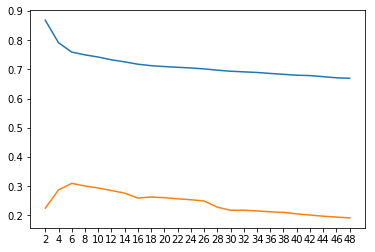

In [123]:
plt.plot(np.mean(train_scores, axis = 1))
plt.plot(np.mean(test_scores, axis = 1))
plt.xticks(np.arange(24), n);

# Cuarvas de Aprendizaje

In [75]:
from sklearn.model_selection import learning_curve

In [126]:
lc = learning_curve(KNeighborsRegressor(n_neighbors = 6), X, y, cv = 5)
lc

(array([ 177,  577,  976, 1376, 1776]),
 array([[0.73137814, 0.54347388, 0.54347388, 0.54347388, 0.54347388],
        [0.7172216 , 0.6874683 , 0.67612525, 0.67612525, 0.67612525],
        [0.72048185, 0.74489894, 0.7303819 , 0.7216836 , 0.7216836 ],
        [0.71867144, 0.76263478, 0.7569267 , 0.74900356, 0.74853204],
        [0.71882872, 0.77524359, 0.77285199, 0.76729186, 0.76245665]]),
 array([[ 3.33418389e-01, -1.59695814e+00, -8.82111210e+00,
         -1.86782000e+01, -2.29247727e+01],
        [ 3.54518984e-01,  5.82744244e-01,  2.74286697e-01,
         -2.09063033e-01, -1.90604803e-01],
        [ 3.53902555e-01,  5.94866605e-01,  1.62689828e-01,
         -3.52114650e-01, -3.12381914e-01],
        [ 3.53902555e-01,  5.92497990e-01,  1.60518983e-01,
          6.23338761e-02, -2.06197589e-02],
        [ 3.52641569e-01,  5.98627520e-01,  2.06512855e-01,
          1.45302738e-01,  2.29903192e-01]]))

In [127]:
samples, train, test = lc[0], lc[1], lc[2]

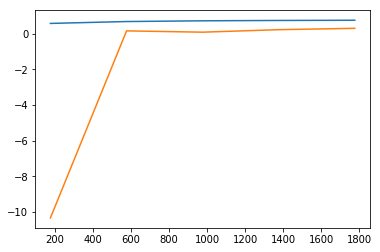

In [128]:
plt.plot(samples, np.mean(train, axis = 1))
plt.plot(samples, np.mean(test, axis = 1))

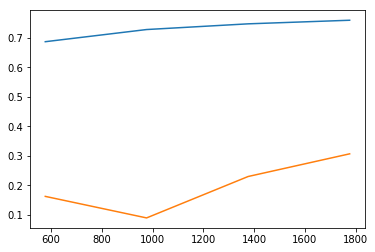

In [137]:
plt.plot(samples[1:], np.mean(train, axis = 1)[1:])
plt.plot(samples[1:], np.mean(test, axis = 1)[1:])

**El modelo aún está aprendiendo, sin embargo no tenemos como obtener mas datos adicionales**

# Introducción a Ensemble y Árboles de Decisión

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Decision Tress

In [3]:
from sklearn.tree import DecisionTreeRegressor

### DecisionTreeRegressor()
- max_depth = 2

In [11]:
tree = DecisionTreeRegressor(max_depth = 2)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [13]:
import graphviz
from sklearn.tree import export_graphviz

In [17]:
treedot = export_graphviz(tree, out_file = None, feature_names = X.columns)
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 41613376.0\\nmse = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.3333822193127824e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 4923666241203538.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="mse = 3.147813101998767e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nmse = 1.10398118715936e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 4.067538845924502e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="mse = 1.2226485798747546e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

In [ ]:
graphviz.Source(treedot)

**Virtudes de los arboles de decision:**

- Metodo poderoso y probado
- Interpretable
- No necesita escalar los datos (clasificación), y menos preprocesamiento de variables

Sin embargo en la practica existen modelos que obtienen mejor rendimiento. Como mejorar el modelo de arboles de decisión?

# Random Forest  y Gradient Boosting Trees

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate

**Concepto General**

Random Forest y Gradient Boosted Trees, forman parte de una familia de algoritmos que se denominan ensembles.

$$ Ensemble = Submodelos \rightarrow Entrenamiento \rightarrow Predicciones_{Intermedias} \rightarrow Voto \rightarrow Prediccion_{final}$$ 

**Cómo funciona el algoritmo Random Forest?**

Vamos a generar cientos de modelos de arboles de decisión que serán entrenados sobre **conjuntos de datos bootstrapeados** del conjunto de datos original y donde para cada etapa de separación el **conjunto de features elegibles** sera un subconjunto aleatorio del conjunto original de features.

In [25]:
forest = RandomForestRegressor(200)
results = cross_validate(forest, X, y, cv = 5,return_train_score = True, scoring = 'r2')

In [26]:
results

{'fit_time': array([2.28669333, 2.0756979 , 2.28913283, 2.33252525, 2.04758692]),
 'score_time': array([0.03005767, 0.04042768, 0.04597688, 0.03525567, 0.03897548]),
 'test_score': array([0.44690044, 0.68691831, 0.58376994, 0.42789758, 0.46875347]),
 'train_score': array([0.961488  , 0.96908272, 0.96620745, 0.96601973, 0.96340388])}

In [28]:
train_score = results['train_score']
test_score = results['test_score']
print(np.mean(train_score))
print(np.mean(test_score))

0.9652403554537046
0.5228479478527135


Mejor resultado que Lasso! Ya no tenemos Bias y tenemos un mejor score r2. Sin embargo tenemos una diferencia importante entre score de entrenamiento y de test (overfit).

In [31]:
ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, X, y, cv = 5, return_train_score = True, scoring = 'r2')

In [32]:
train_score = results['train_score']
test_score = results['test_score']
print(np.mean(train_score))
print(np.mean(test_score))

0.9152752861037458
0.5302980881158683


# Opctimización de hiperparámetros

- Fijar un learning rate alto
- Fijar parametros de los arboles
- Fijados estos parametros, elegir el mejor numero de estimadores que conforman el ensemble
- (Tarea) Con el learning rate dado y el numero de estimadores óptimo, optimizar los parametros de los arboles

**Grid Search**

Por ahora dijimos que:
    
- train_test_split servia para evaluaciones rapidas, testeos y prototipaje
- cross_validate es un método más robusto para poder estimar el rendimiento de tu algoritmo

Sin embargo una vez que hemos finalizado nuestra etapa de prototipaje y ya queremos establecer un modelo definitivo deberiamos seguir el flujo siguiente.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1) 

In [34]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_test1 = {'n_estimators': range(20,501,20)}

In [39]:
estimator = GradientBoostingRegressor(learning_rate = 0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

### - GridSearchCV()
- model = 
- param_grid = 
- scoring = 
- cv = 

In [40]:
gsearch1 = GridSearchCV(estimator,
                       param_grid = param_test1,
                       scoring = 'r2',
                       cv = 5)

In [41]:
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [55]:
gsearch1.cv_results_

{'mean_fit_time': array([0.08678598, 0.07007279, 0.0658896 , 0.1047832 , 0.1262228 ,
        0.12172027, 0.14361501, 0.16660218, 0.18792515, 0.22006955,
        0.22286725, 0.24725294, 0.27300644, 0.28483982, 0.30703068,
        0.35891333, 0.46673651, 0.41446385, 0.41077275, 0.4112411 ,
        0.49921579, 0.45223794, 0.49818993, 0.66901207, 0.5974432 ]),
 'std_fit_time': array([0.09568633, 0.00417605, 0.00277662, 0.01321256, 0.02055282,
        0.00292451, 0.00689219, 0.00547462, 0.00796282, 0.02174536,
        0.00346222, 0.0041845 , 0.01292182, 0.00469001, 0.00636492,
        0.03796579, 0.04219057, 0.06532408, 0.03387635, 0.01051763,
        0.04283744, 0.00615329, 0.0434785 , 0.06963711, 0.29722137]),
 'mean_score_time': array([0.00339746, 0.00439663, 0.00230107, 0.00519395, 0.00339971,
        0.00299711, 0.003198  , 0.00339599, 0.00319757, 0.00479388,
        0.00419579, 0.00499692, 0.00459752, 0.00539269, 0.00499606,
        0.00519581, 0.00779777, 0.00579386, 0.00659399, 0.00

**.best_parms_**

In [60]:
print(gsearch1.best_params_)

{'n_estimators': 420}


**.best_estimator**

In [106]:
gsearch1.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=420,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

**cross_validate()**

In [68]:
final_results = cross_validate(gsearch1.best_estimator_,X_train, y_train,return_train_score=True)

In [69]:
train_score = final_results['train_score']
test_score = final_results['test_score']
print(np.mean(train_score))
print(np.mean(test_score))

0.8391178312450979
0.738898751310067


In [65]:
final_results

{'fit_time': array([0.3646965 , 0.33150125, 0.28278446]),
 'score_time': array([0.01060104, 0.01008034, 0.01010203]),
 'test_score': array([0.63840944, 0.81134462, 0.76694219])}

In [84]:
estimator = GradientBoostingRegressor(n_estimators=420,
                                     learning_rate = 0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

In [95]:
estimator.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=420,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
estimator.score(X_test, y_test)

0.817860680423855

In [92]:
from sklearn.metrics import mean_squared_error

In [97]:
pred_y = estimator.predict(X_test) 

In [100]:
error = np.sqrt(mean_squared_error(y_test, pred_y))
error

72344096.1943045

In [101]:
error / y.mean()

0.5245276726398023